In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]  =(20,10)

In [2]:
df_price = pd.read_csv("data_set/bengaluru_house_prices.csv")

In [3]:
df_price.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df_price.shape

(13320, 9)

In [5]:
grouped_data = df_price.groupby('area_type')[['area_type','availability']].count()
print(grouped_data[['area_type','availability']])
#we are grouping area_type then making table with only two coulmns area_type and availablity

                      area_type  availability
area_type                                    
Built-up  Area             2418          2418
Carpet  Area                 87            87
Plot  Area                 2025          2025
Super built-up  Area       8790          8790


In [6]:
filtered_df = df_price.drop(['area_type', 'society', 'balcony','availability'],axis='columns')
filtered_df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
filtered_df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
filtered_df_with_na = filtered_df[filtered_df.isna().any(axis=1)]


In [9]:
print(filtered_df_with_na.head(20))

            location       size         total_sqft  bath    price
56       Devanahalli  4 Bedroom        3010 - 3410   NaN  192.000
81       Hennur Road  4 Bedroom        2957 - 3450   NaN  224.500
224      Devanahalli      3 BHK        1520 - 1740   NaN   74.820
344   Kanakpura Road      1 BHK                525   NaN   21.530
568              NaN      3 BHK               1600   3.0   86.000
579   Sarjapur  Road        NaN        1200 - 2400   NaN   34.185
669         JP Nagar      5 BHK        4400 - 6640   NaN  375.000
702         JP Nagar      5 BHK        4400 - 6800   NaN  548.500
801         JP Nagar      4 BHK        4000 - 5249   NaN  453.000
941       Whitefield  4 Bedroom        3606 - 5091   NaN  304.000
1264          Hennur  3 Bedroom               2264   NaN  155.000
1267       Yelahanka      3 BHK        1440 - 1884   NaN   67.980
1686      Whitefield      1 BHK          660 - 670   NaN   28.585
1724     Thanisandra      1 BHK          620 - 933   NaN   48.145
1765      

In [10]:
filtered_df_without_na = filtered_df.dropna()
filtered_df_without_na.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
filtered_df_without_na.head()


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
filtered_df_without_na['size'].unique() #here we are making a set of unique values

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
filtered_df_without_na['bhk'] = filtered_df_without_na['size'].apply(lambda x: int(x.split(' ')[0]))
#here we are making a new column with the data from size column and appling a lambda function to it to extract the no of rooms in it by spliting and taking the first half of the data

C:\Users\rohit.sharma\AppData\Local\Temp\ipykernel_24800\553274001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_without_na['bhk'] = filtered_df_without_na['size'].apply(lambda x: int(x.split(' ')[0]))


In [14]:
filtered_df_without_na.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
filtered_df_without_na[filtered_df_without_na.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [16]:
filtered_df_without_na.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_real_numb(x):
    try: 
        float(x)
    except:
        return False
    return True

In [18]:
filtered_df_without_na[~filtered_df_without_na['total_sqft'].apply(is_real_numb)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [19]:
filtered_df_without_na.loc[137]

location      8th Phase JP Nagar
size                       2 BHK
total_sqft           1042 - 1105
bath                         2.0
price                     54.005
bhk                            2
Name: 137, dtype: object

In [20]:
# this function is taking average of range based entries and a
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except: 
        return None

In [21]:
convert_sqft_to_num('2123 - 2900')  #test

2511.5

In [22]:
filtered_data = filtered_df_without_na.copy()

In [23]:
filtered_data['total_sqft'] = filtered_data['total_sqft'].apply(convert_sqft_to_num)

In [24]:
filtered_data.loc[137]  #test

location      8th Phase JP Nagar
size                       2 BHK
total_sqft                1073.5
bath                         2.0
price                     54.005
bhk                            2
Name: 137, dtype: object

In [25]:
filtered_data_1 = filtered_data.copy()

In [26]:
filtered_data_1['price_per_sqft'] = filtered_data_1['price']*100000/filtered_data_1['total_sqft']
filtered_data_1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [27]:
len(filtered_data_1.location.unique())

1304

In [28]:
filtered_data_1.location = filtered_data_1.location.apply(lambda x : x.strip())    #need to remove extra space from the words
location_stats = filtered_data_1.groupby('location')['location'].agg('count')
location_stats.sort_values(ascending = False)

location
Whitefield                   535
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               266
Thanisandra                  236
                            ... 
adigondanhalli                 1
akshaya nagar t c palya        1
anjananager magdi road         1
arudi                          1
2Electronic City Phase II      1
Name: location, Length: 1293, dtype: int64

In [29]:
len(location_stats[location_stats<=10])

1052

In [30]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1052, dtype: int64

In [31]:
filtered_data_1.location = filtered_data_1.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
#it will update the value in the caoluns with word 'other' for values less than 10 readings in the whole list

In [32]:
len(filtered_data_1)

13246

In [42]:
len(filtered_data_1.location.unique())
print(filtered_data_1.groupby('location'))

In [34]:
a = (filtered_data_1.location == 'other').sum()
print(a)

2881


In [35]:
filtered_data_1[filtered_data_1.total_sqft/filtered_data_1.bhk <300 ].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [36]:
filtered_data_2 = filtered_data_1[~((filtered_data_1.total_sqft/filtered_data_1.bhk) <300)]
filtered_data_2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [37]:
filtered_data_2.shape

(12502, 7)

In [38]:
filtered_data_2.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [47]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

filtered_data_3 = remove_pps_outliers(filtered_data_2)
filtered_data_3.shape
    

(10241, 7)

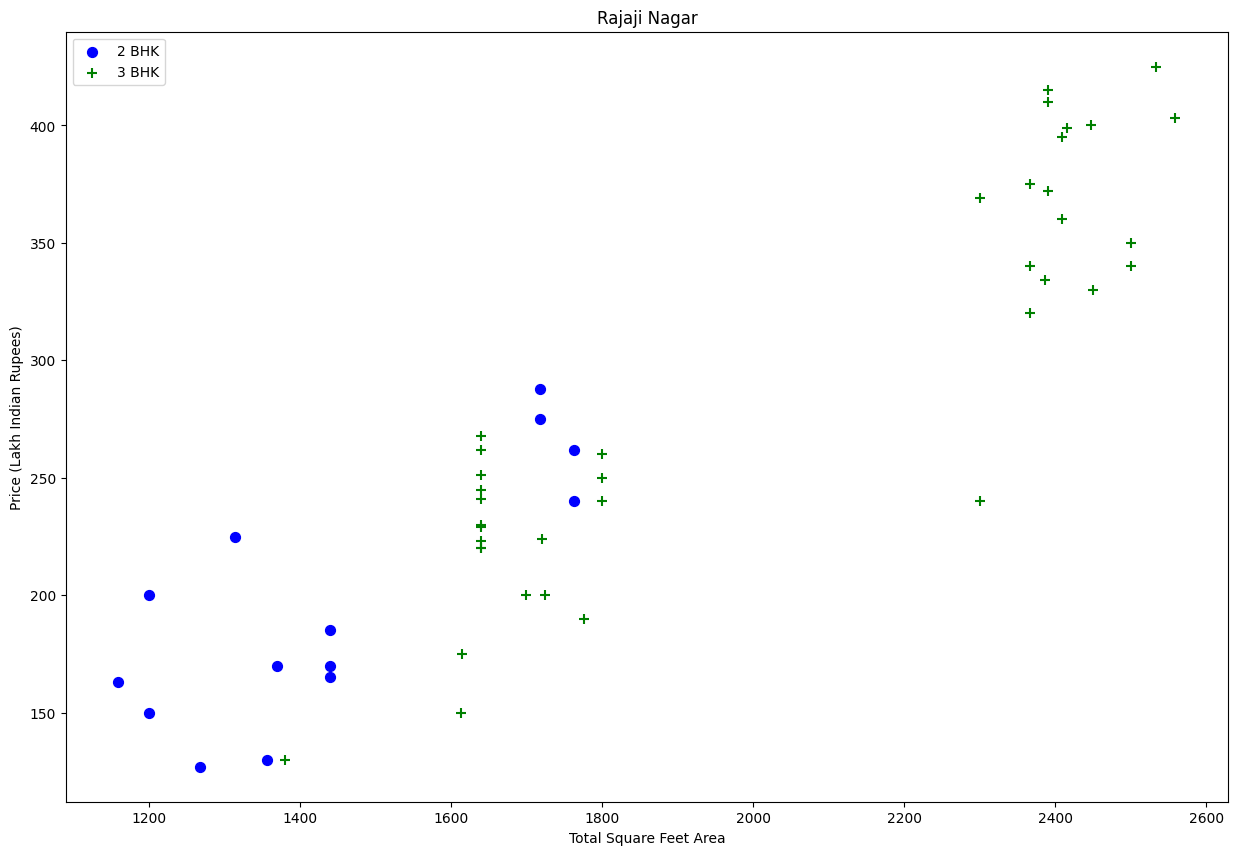

In [50]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(filtered_data_3,"Rajaji Nagar")

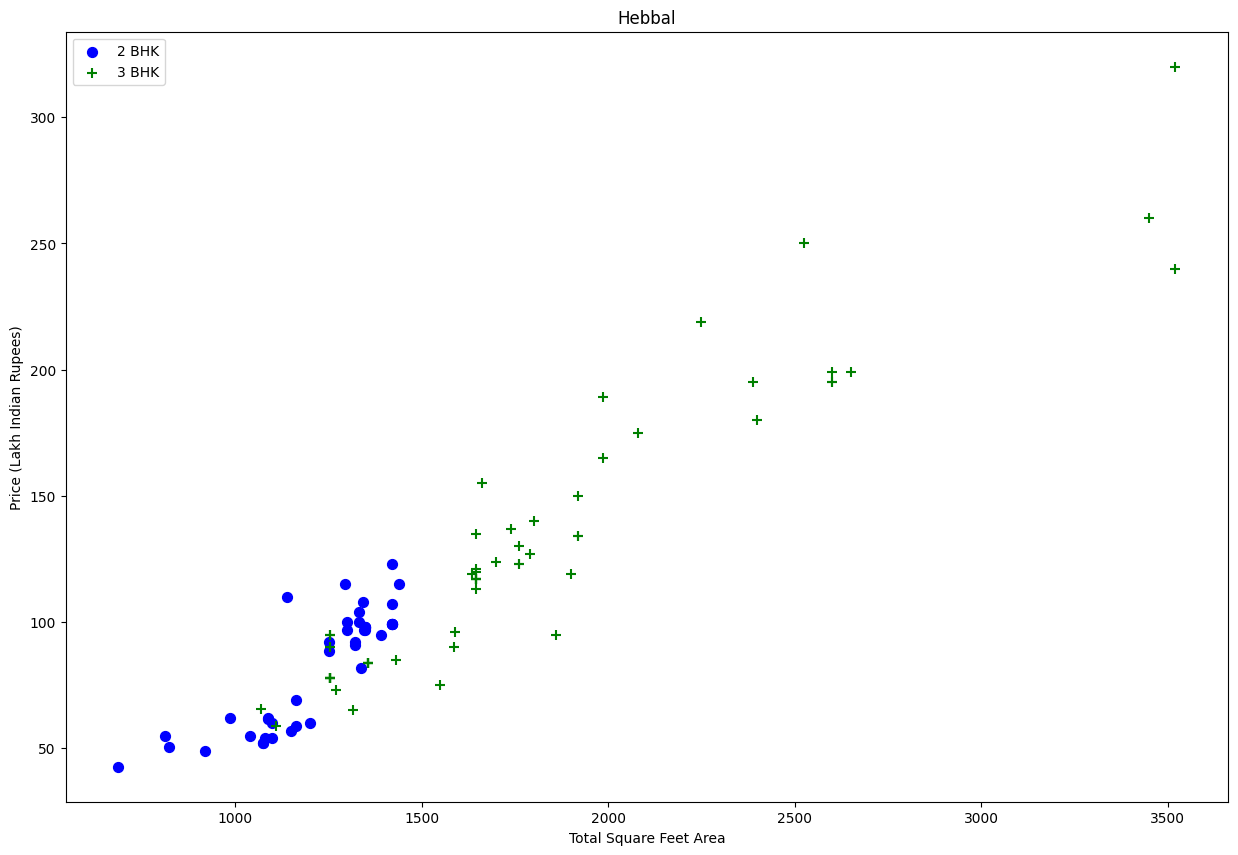

In [52]:
plot_scatter_chart(filtered_data_3,"Hebbal")

In [53]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
filtered_data_4 = remove_bhk_outliers(filtered_data_3)
# df8 = df7.copy()
filtered_data_4.shape

(7329, 7)

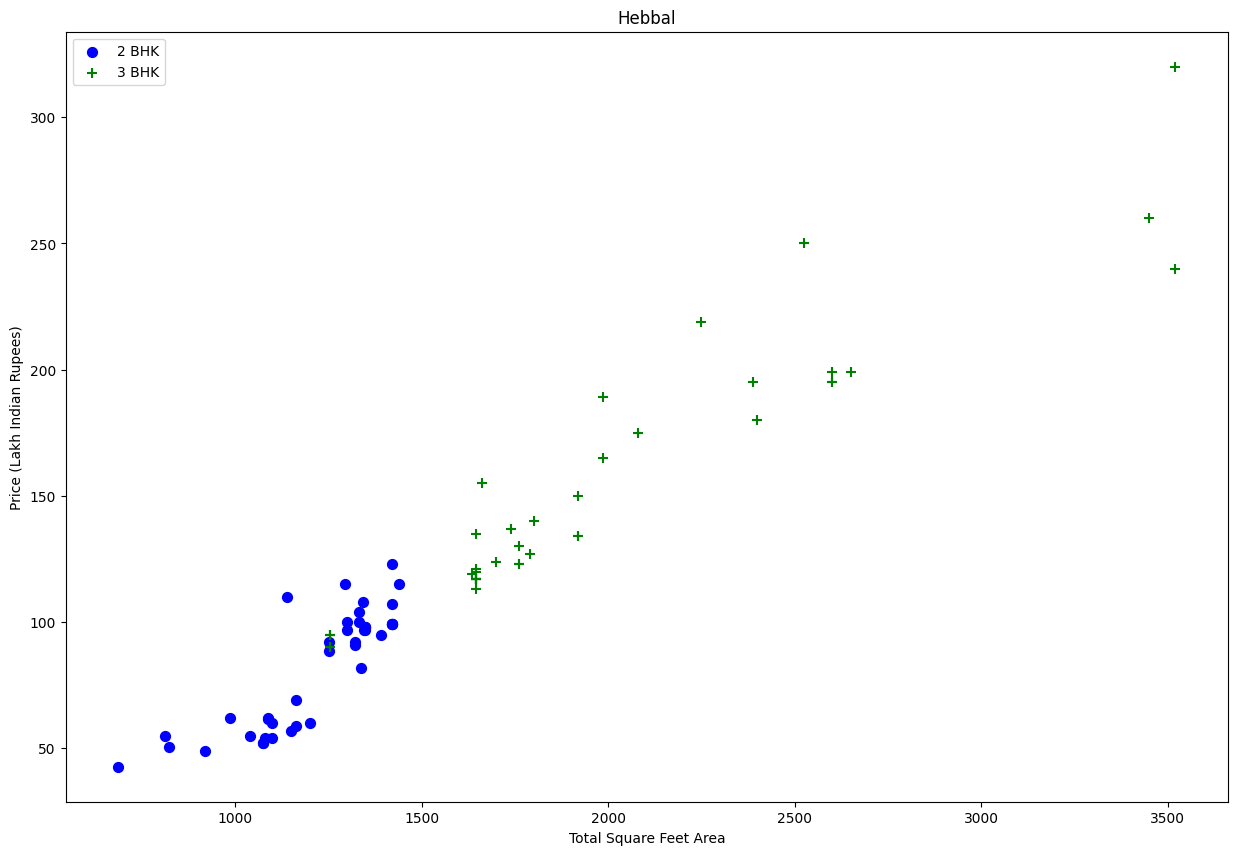

In [56]:
plot_scatter_chart(filtered_data_4,"Hebbal")

Text(0, 0.5, 'Count')

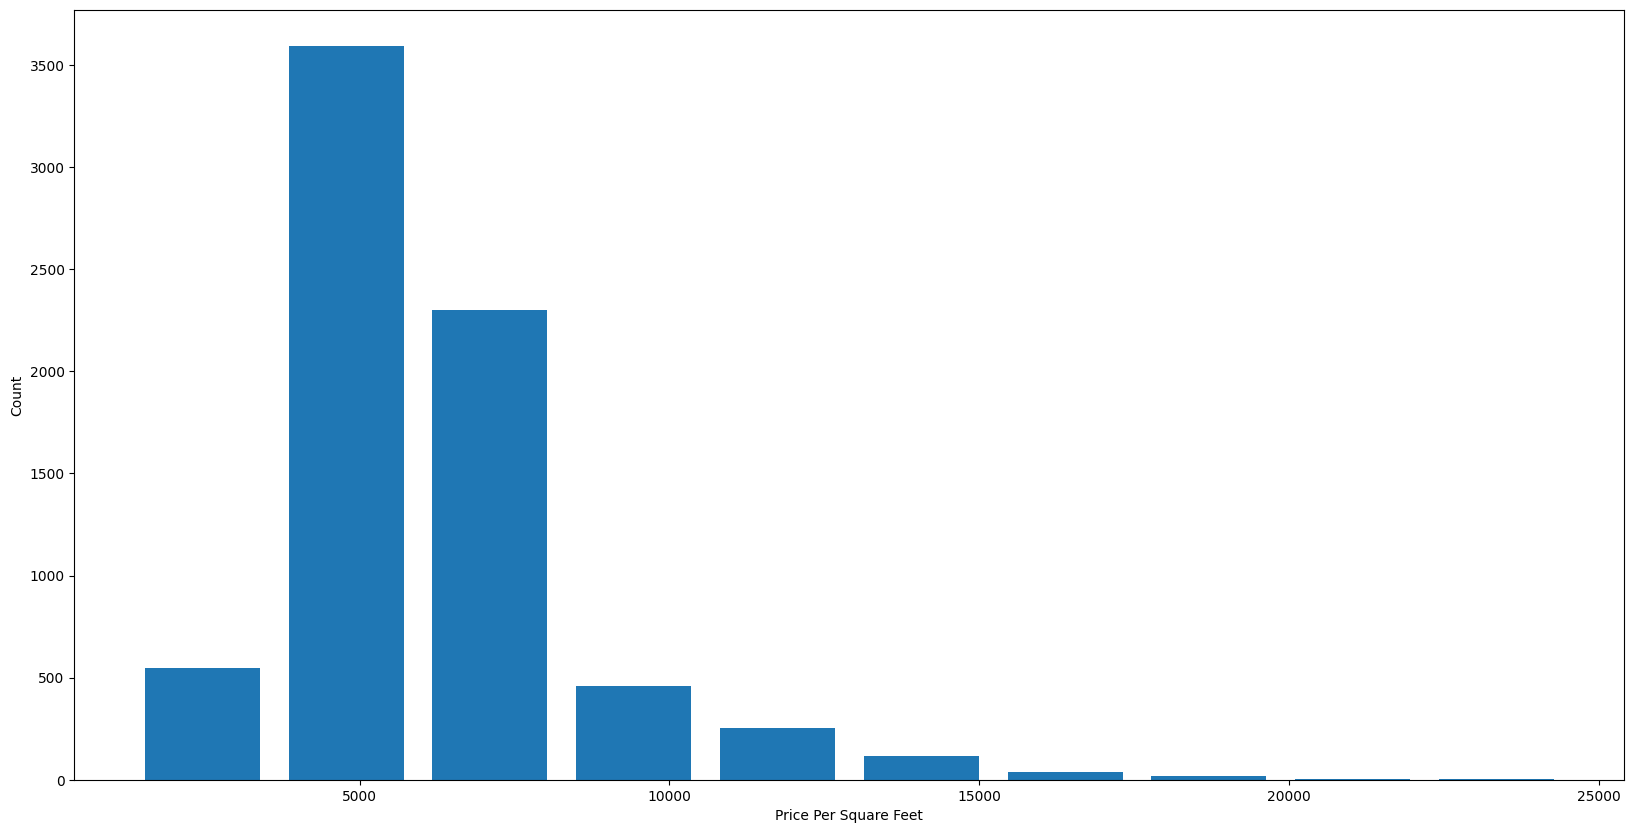

In [58]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(filtered_data_4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [60]:
filtered_data_4.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

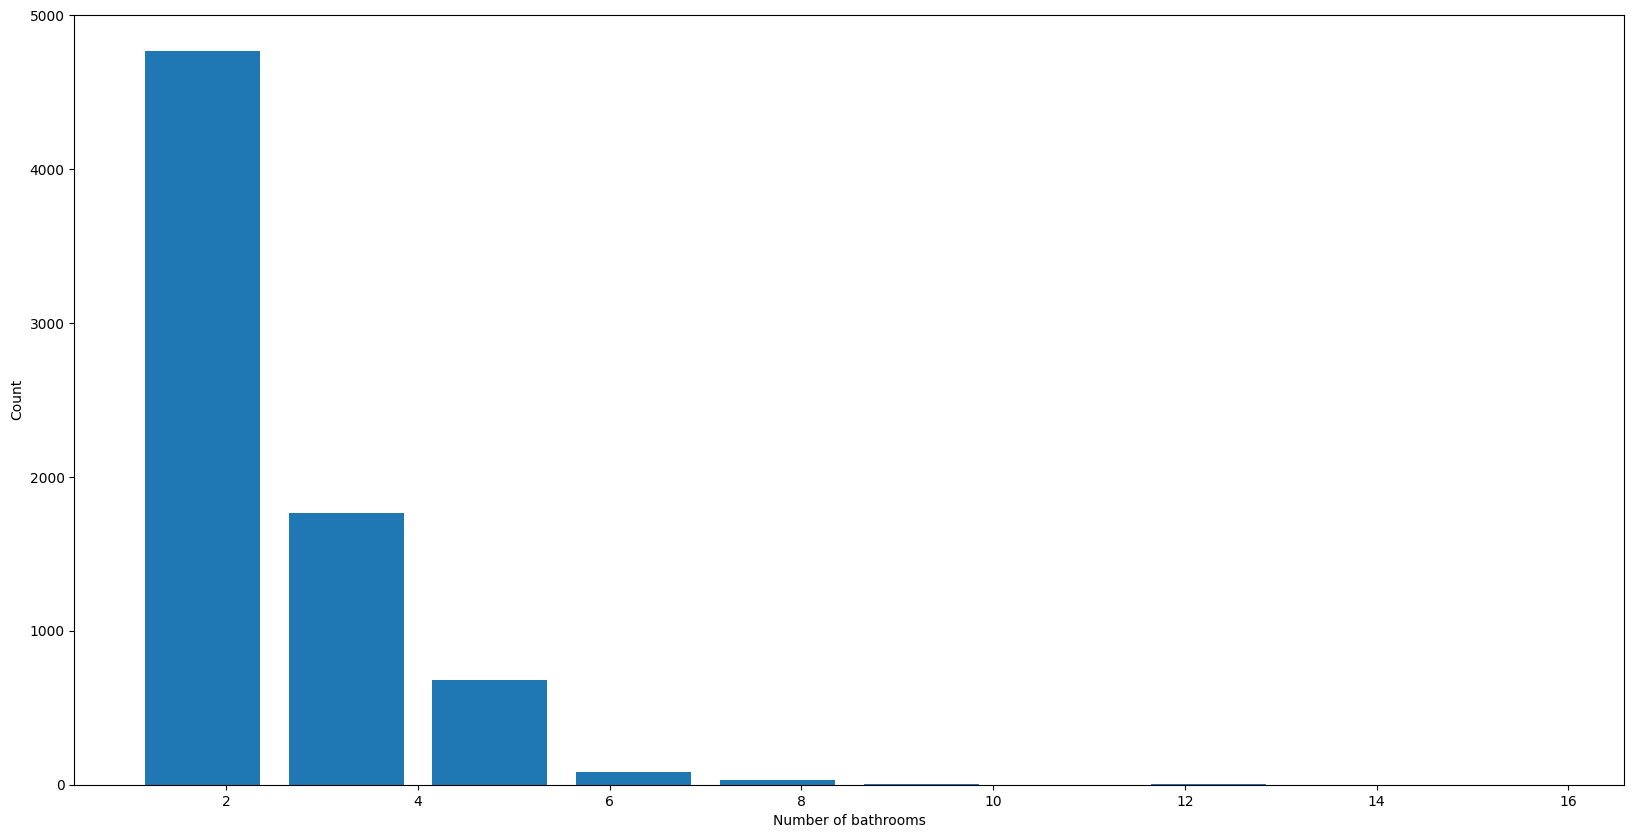

In [61]:
plt.hist(filtered_data_4.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [63]:
filtered_data_4[filtered_data_4.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [64]:
filtered_data_4[filtered_data_4.bath>filtered_data_4.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [65]:
filtered_data_5 = filtered_data_4[filtered_data_4.bath<filtered_data_4.bhk+2]
filtered_data_5.shape

(7251, 7)

In [66]:
filtered_data_5.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [67]:
filtered_data_6 = filtered_data_5.drop(['size','price_per_sqft'],axis='columns')
filtered_data_6.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [68]:
dummies = pd.get_dummies(filtered_data_6.location)
dummies.shape

(7251, 242)

In [69]:
model_data = pd.concat([filtered_data_6,dummies.drop('other',axis = 'columns')],axis='columns')
model_data.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
 model_data1 = model_data.drop('location',axis='columns')
model_data1.shape

(7251, 245)

In [77]:
X = model_data1.drop('price', axis = 'columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [79]:
y = model_data1.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [80]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =10) #we have create the distribution of the data in ration 8-2

In [91]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

#turns out to be the best model

0.8452277697874374

In [86]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286,
       0.77463657, 0.84724578, 0.84813854, 0.84493306, 0.85893313])

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

def find_best_model_using_gridsearchcv(X,y):
    scaler = StandardScaler()
    algos = {
        'linear_regression' : {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('model', LinearRegression())
            ]),
            'params': {
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\rohit.sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rohit.sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rohit.sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "C:\Users\rohit.sharma\AppData\Local\Programs\Python\Python310\lib\s

,model,best_score,best_params
0,linear_regression,0.818354,{}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.708417,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [92]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [93]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\rohit.sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(83.49904677204199)

In [94]:
predict_price('Indira Nagar',1000,2,2)

C:\Users\rohit.sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(181.2781548400642)

In [96]:
predict_price('Indira Nagar',1200,3,3)

C:\Users\rohit.sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(200.4673768052179)

In [97]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [98]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))